In [1]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math
from datetime import datetime

In [2]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

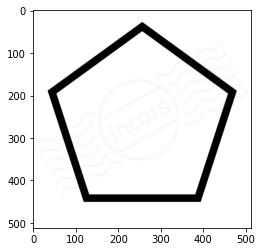

In [3]:
apic = pil.Image.open("../Image/shape_pentagon.png")
myimg = img2array(apic)
plt.imshow(myimg)

In [4]:
# Change to gray scale image
start_time = datetime.now()
mygrayimg = rgb2gray(myimg)
end_time = datetime.now()
print('Duration - {}: {}'.format("rgb2gray", end_time - start_time))
# Apply Gaussian Filter
start_time = datetime.now()
mygraysmoothimg=applyGaussFilter(mygrayimg, mygauss)
end_time = datetime.now()
print('Duration - {}: {}'.format("ApplyGaussFilter", end_time - start_time))
# Calculate Gradients and Angles
start_time = datetime.now()
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateGradient", end_time - start_time))
# Calculate Non Max Suppression
start_time = datetime.now()
NMS_G = non_max_suppression(G, theta)
end_time = datetime.now()
print('Duration - {}: {}'.format("non_max_suppression", end_time - start_time))
# Calculate double threshold
start_time = datetime.now()
mythreshold, weak, strong = threshold(NMS_G, 0.001, 0.1)
end_time = datetime.now()
print('Duration - {}: {}'.format("threshold", end_time - start_time))
# Calculate hysteresis
start_time = datetime.now()
myhysteresis = hysteresis(mythreshold, weak)
end_time = datetime.now()
print('Duration - {}: {}'.format("hysteresis", end_time - start_time))

Duration - rgb2gray: 0:00:00.092605
Duration - ApplyGaussFilter: 0:00:18.333495
Duration - calculateGradient: 0:00:06.446107
Duration - non_max_suppression: 0:00:03.488729
Duration - threshold: 0:00:06.202046
Duration - hysteresis: 0:00:00.687529


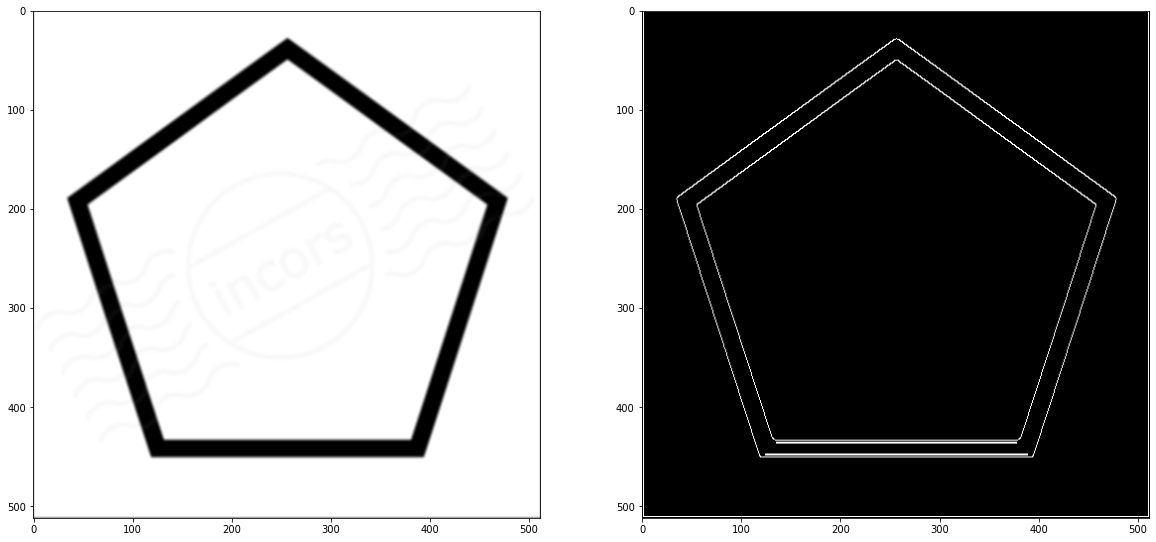

In [5]:
# Smooth vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(mygraysmoothimg, cmap='gray')
axarr[1].imshow(myhysteresis, cmap='gray')

In [6]:
def hough_line(img, theta_res=1, rho_res=1, pfrac=0.1):
    x_max = img.shape[0]
    y_max = img.shape[1]
    
    theta_max = 1.0 * math.pi 
    theta_min = 0.0
    
    r_min = 0.0
    r_max = math.hypot(x_max, y_max)
    r_dim = 200 
    theta_dim = 300

    thetas = np.zeros((theta_dim,1))
    rhos = np.zeros((r_dim,1))
    hough_space = np.zeros((r_dim,theta_dim))

    for x in range(x_max):
        for y in range(y_max):
            if img[x,y]:
                for itheta in range(theta_dim):
                    theta = 1.0 * itheta * theta_max / theta_dim
                    r = x * math.cos(theta) + y * math.sin(theta)
                    ir = int(r_dim * ( 1.0 * r ) / r_max)
                    if ir >= 0 and ir < r_dim:
                        hough_space[ir,itheta] = hough_space[ir,itheta] + 1
  

    return hough_space, thetas, rhos

In [7]:
start_time = datetime.now()
myHoughimg, thetas, rhos = hough_line(myhysteresis, 0.6, 3.64, 0.1)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:08.101857


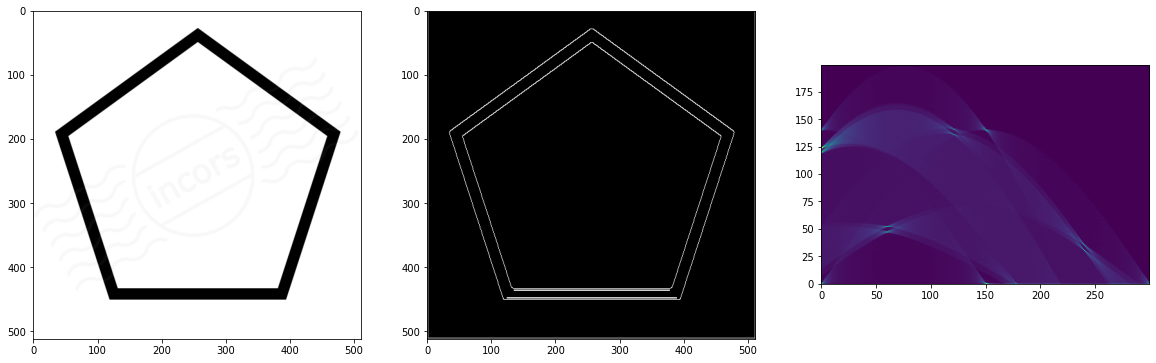

In [8]:
# Orig vs. Gray vs. Hough transform
f, axarr = plt.subplots(1,3, figsize=(20, 20))
axarr[0].imshow(myimg)
axarr[1].imshow(myhysteresis, cmap='gray')
axarr[2].imshow(myHoughimg, origin='lower')

In [74]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

neighborhood_size = 10
threshold = 250

width, height = myhysteresis.shape
r_max = np.ceil(np.sqrt(width * width + height * height))   # max_dis
theta_max = np.pi
r_dim, theta_dim = myHoughimg.shape

x_max = width
y_max = height

# GxH, GyH, GH, thetaH = calculateGradient(myHoughimg)

epsilon = 0.000001
x, y = [], []

for i in range(r_dim):
    for j in range(theta_dim):
        if np.abs(myHoughimg[i,j]) > threshold:
            x.append(j)
            y.append(i)
            
# Filter zeros.
# tmpx = np.copy(x)
# tmpy = np.copy(y)
# x, y = [], []
# for i in range(len(tmpx)):
#     if tmpx[i] > 0 and tmpy[i] > 0:
#         x.append(tmpx[i])
#         y.append(tmpy[i])
        
# Keep only the bigest in 
tmpx = np.copy(x)
tmpy = np.copy(y)
x, y = [], []

while len(tmpx)>0:
    
    maxval = myHoughimg[tmpy[0], tmpx[0]]
    current_maxx = tmpx[0]
    current_maxy = tmpy[0]
    
    for i in range(len(tmpx)):
        if myHoughimg[tmpy[i], tmpx[i]]> maxval:
            maxval = myHoughimg[tmpy[i], tmpx[i]]
            current_maxx = tmpx[i]
            current_maxy = tmpy[i]
    
    x.append(current_maxx)
    y.append(current_maxy)
            
    # Remove the biggest and local maximum nearby
    newx = []
    newy = []
    
    for i in range(len(tmpx)):
        if np.sqrt(np.abs(tmpx[i] - current_maxx)*np.abs(tmpx[i] - current_maxx) + np.abs(tmpy[i] - current_maxy)*np.abs(tmpy[i] - current_maxy)) > neighborhood_size:
            newx.append(tmpx[i])
            newy.append(tmpy[i])
            
    tmpx = newx
    tmpy = newy
    
    print("new len: ", len(newx))



print("x_len: ", len(x))
print("x: ", x)
print("y: ", y)


new len:  36
new len:  34
new len:  31
new len:  27
new len:  24
new len:  23
new len:  13
new len:  5
new len:  1
new len:  0
x_len:  10
x:  [1, 0, 150, 150, 0, 299, 240, 60, 120, 178]
y:  [124, 140, 140, 0, 0, 0, 35, 47, 141, 0]


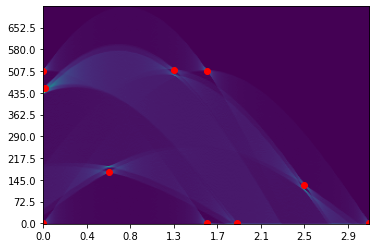

In [75]:
plt.imshow(myHoughimg, origin='lower')
tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.autoscale(False)
plt.plot(x,y, 'ro')

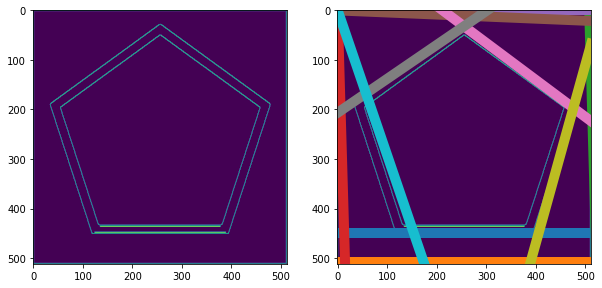

In [76]:
# Step 4: Plot lines

line_index = 1
width, height = myhysteresis.shape
r_max = np.ceil(np.sqrt(width * width + height * height))   # max_dis
theta_max = np.pi
r_dim, theta_dim = myHoughimg.shape

x_max = width
y_max = height

f, axarr = plt.subplots(1,2, figsize=(10, 10))
axarr[0].imshow(myhysteresis)
axarr[1].imshow(myhysteresis)


for i,j in zip(y, x):

    r = round( (1.0 * i * r_max ) / r_dim,1)
    theta = round( (1.0 * j * theta_max) / theta_dim,1)

    

    axarr[1].autoscale(False)

    px = []
    py = []
    for i in range(-y_max-40,y_max+40,1):
        px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
        py.append( math.sin(-theta) * i + math.cos(-theta) * r )

    axarr[1].plot(px,py, linewidth=10)

In [67]:
maxima = (myHoughimg == data_max)